In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Print dataset columns
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [22]:

# Define features and target
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238




Confusion Matrix:


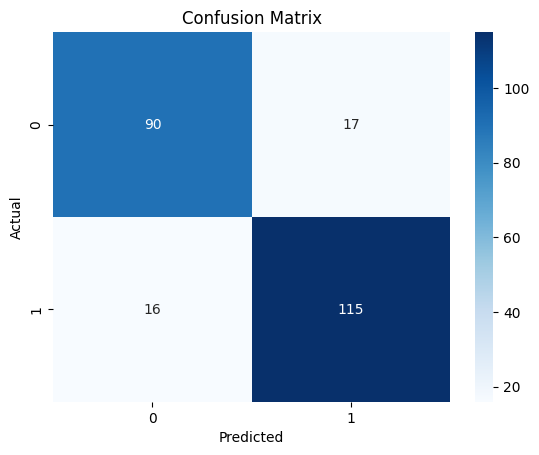

In [23]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Accuracy: 86.13%


In [28]:
# Predict for a new patient
# Example patient data: Replace these values with the actual patient data
new_patient = {
    'age': 45,
    'sex': 1,
    'chest pain type': 4,
    'resting bp s': 130,
    'cholesterol': 237,
    'fasting blood sugar': 0,
    'resting ecg': 2,
    'max heart rate': 170,
    'exercise angina': 0,
    'oldpeak': 0.0,
    'ST slope': 1,
      # One-hot encoded column
    
   
}

# Convert the new patient data to a DataFrame
new_patient_df = pd.DataFrame([new_patient])

# Predict heart disease for the new patient
prediction = model.predict(new_patient_df)[0]  # Get the first (and only) prediction
probability = model.predict_proba(new_patient_df)[0]  # Get probability scores

# Output the result
if prediction == 1:
    print("\nThe patient is predicted to have heart disease.")
else:
    print("\nThe patient is predicted NOT to have heart disease.")

print(f"Probability of NOT having heart disease: {probability[0] * 100:.2f}%")
print(f"Probability of having heart disease: {probability[1] * 100:.2f}%")


The patient is predicted NOT to have heart disease.
Probability of NOT having heart disease: 75.55%
Probability of having heart disease: 24.45%
